# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

**c.** The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

**d.** The proportion of users converted.

In [5]:
converted_prop = df.user_id[df.converted == 1].nunique()/df.user_id.nunique()

In [6]:
converted_prop

0.12104245244060237

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [7]:
df[(df.group =='treatment')&(df.landing_page != 'new_page')].shape[0]

1965

**f.** Do any of the rows have missing values?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


There are no missing values


*Dropping rows where `control`≠`old_page` and `treatment` ≠ `new_page`

In [9]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2 = df.drop(df[(df.group =='treatment')&(df.landing_page != 'new_page')].index).reset_index(drop = True)
df2 = df2.drop(df2[(df2.group =='control')&(df2.landing_page != 'old_page')].index).reset_index(drop = True)
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [10]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

*Checking and dropping rows with duplicate  `user_id`*

**a.** How many unique **user_id**s are in **df2**?

In [11]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

In [12]:
df2.shape

(290585, 5)

In [13]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [14]:
df2.dtypes

user_id          int64
timestamp       object
group           object
landing_page    object
converted        int64
dtype: object

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [15]:
df2.user_id[df2.user_id.duplicated()]

2862    773192
Name: user_id, dtype: int64

**c.** Display the rows for the duplicate **user_id**? 

In [16]:
df2[df2.user_id ==773192]

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [17]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 

df2.drop(df2.index[[2862]], inplace=True)
# Check again if the row with a duplicate user_id is deleted or not

In [18]:
df2 = df2.reset_index(drop=True)

In [19]:
df2.nunique()

user_id         290584
timestamp       290584
group                2
landing_page         2
converted            2
dtype: int64

In [20]:
df2[df2.user_id ==773192]

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

In [21]:
conv_prop = len(df2[df2.converted==1])/len(df2)
conv_prop

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [22]:
control_conv_rate = len(df2[(df2.converted==1)&(df2.group == 'control')])/ len(df2[(df2.group == 'control')])
control_conv_rate

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [23]:
treatment_conv_rate = len(df2[(df2.converted==1)&(df2.group == 'treatment')])/ len(df2[(df2.group == 'treatment')])
treatment_conv_rate

0.11880806551510564

In [24]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = treatment_conv_rate - control_conv_rate
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [25]:
new_page_prop = df2[(df2.landing_page == 'new_page')].shape[0]/df2.shape[0]
new_page_prop

0.5000619442226688

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

>***Answer***

The values of `treatment_conv_rate` and `control_conv_rate` are almost the same, and their difference is almost zero. With these, it is obvious that treatment group users do not lead to more conversions.

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

> ***Answer***

h0: `𝑝𝑜𝑙𝑑` <= `𝑝𝑛𝑒𝑤`

h1:  `𝑝𝑛𝑒𝑤`> `𝑝𝑜𝑙𝑑`

###  Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [26]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [27]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [28]:
n_new = df2[(df2.group == 'treatment')].shape[0]
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [29]:
n_old = df2[(df2.group == 'control')].shape[0]
n_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>
*Hint*: Use `numpy.random.choice()` method to randomly generate $n_{new}$ number of values. <br>
Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.


In [30]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice([0,1], n_new, p = [p_new,1-p_new])

In [31]:
treatment_sample_mean = new_page_converted.mean()


In [32]:
treatment_sample_mean

0.88170119055811713

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [33]:
# Simulate a Sample for the control Group

old_page_converted = np.random.choice([0,1], n_old, p = [p_old,1-p_old])

In [34]:
control_sample_mean = old_page_converted.mean()

In [35]:
control_sample_mean

0.88178889546649775

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [36]:
obs_samp_diff = treatment_sample_mean - control_sample_mean
obs_samp_diff

-8.7704908380614732e-05


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [37]:
# Sampling distribution 
p_diffs = []
new_page_converted = np.random.binomial(n_new, p_new, 10000)/n_new
old_page_converted = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_page_converted - old_page_converted

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  

>**Tip**: Display title, x-label, and y-label in the chart.

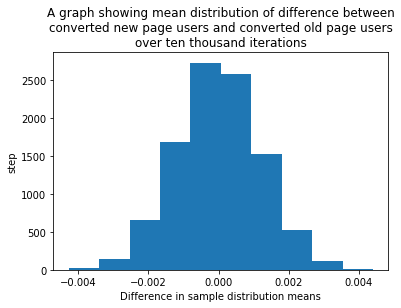

In [38]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs)
plt.xlabel('Difference in sample distribution means')
plt.ylabel('step')
plt.title('A graph showing mean distribution of difference between\nconverted new page users and converted old page users\nover ten thousand iterations')
plt.show();

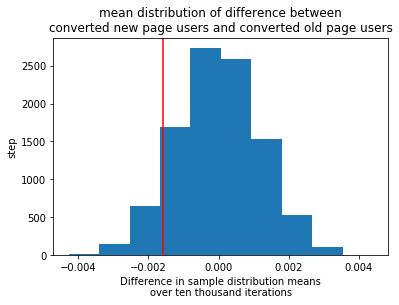

In [39]:
plt.hist(p_diffs)
plt.axvline(obs_diff, color='r')
plt.xlabel('Difference in sample distribution means\nover ten thousand iterations')
plt.ylabel('step')
plt.title('mean distribution of difference between\nconverted new page users and converted old page users')
plt.show();

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [40]:
p_value = (p_diffs > obs_diff).mean()
p_value

0.90380000000000005

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

>***Answer***

`p_value` is actually a statistical value called a **p_value**. It is a probability of observing a statistic if the null hypothesis is true.

Remember, null hypothesis says $p_{new}$ = $p_{old}$. Here, my alternative hypothesis is $p_{new}$ > $p_{old}$. Since the alternative hypothesis is one-sided (right-tailed), therefore the **p_value** is calculated from one extreme($p_{new}$ > $p_{old}$) which gives a value of about **0.9**.

Since the **p_value** is higher than 0.05, therefore, it is not statistically significant and we take the null hypothesis as true, i.e probability of conversion for old page is approximately the same as that of the new page.



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [41]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = len(df2[(df2.landing_page == 'old_page')&(df2.converted == 1)])

# number of conversions with the new_page
convert_new = len(df2[(df2.landing_page == 'new_page')&(df2.converted == 1)])

# number of individuals who were shown the old_page
n_old = len(df2[df2.landing_page == 'old_page'])

# number of individuals who received new_page
n_new = len(df2[df2.landing_page == 'new_page'])

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 
>**Hint**: <br>
It's a two-tailed if you defined $H_1$ as $(p_{new} = p_{old})$. <br>
It's a left-tailed if you defined $H_1$ as $(p_{new} < p_{old})$. <br>
It's a right-tailed if you defined $H_1$ as $(p_{new} > p_{old})$. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. We determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. In other words, a "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.

>Hint:<br>
For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. <br>
For a left-tailed test, reject null if $Z_{score}$ < $Z_{\alpha}$. 




Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---

>**Tip**: You don't have to dive deeper into z-test for this exercise. **Try having an overview of what does z-score signify in general.** 

In [42]:
import statsmodels.api as sm

z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
print(z_score, p_value)

-1.31092419842 0.905058312759


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

>**Tip**: Notice whether the p-value is similar to the one computed earlier. Accordingly, can you reject/fail to reject the null hypothesis? It is important to correctly interpret the test statistic and p-value.

>***Answer.***

z-score is a statistical value (positive or negative) that tells how many standard deviations a data is away from the mean. If positive, it indicates the score is above the mean and vice versa if negative.

With our **z_score** less than **1.96** and **p_value** = **0.91**, close to the computed **p_value** above, there is no statistical evidence to drop the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

>**Answer**

***Logistic Regression***

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [43]:
df2['intercept'] = 1

df2['ab_page'] = df2.group.apply(lambda x: 1 if x == 'treatment' else 0)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [44]:
logreg = sm.Logit(df2.converted, df2[['intercept', 'ab_page']])
result0 = logreg.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [45]:
result0.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-04-15 08:11 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

In [46]:
result0.params

intercept   -1.988777
ab_page     -0.014989
dtype: float64

In [47]:
np.exp(result0.params)

intercept    0.136863
ab_page      0.985123
dtype: float64

In [48]:
1/np.exp(-0.014989)

1.0151018984334224

>***Answer***

`p_value` and `z_score` for `ab_page` are not significant to make us reject the null hypothesis.<br>

Summary of the model:

    For every one point increase in the number of new pages, it is 1.015 times likely for a user to convert holding other variables constant.

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

**Hints**: 
- What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**? 
- You may comment on if these hypothesis (Part II vs. Part III) are one-sided or two-sided. 
- You may also compare the current p-value with the Type I error rate (0.05).


***Answer***

h0: $p_{new}$ = $p_{old}$<br>
h1: $p_{new}$ ≠ $p_{old}$<br>
`p-value` of `ab_page` is **0.1899** which is higher than **p_values** above. This is because Python computes **P_value** for alternative hypothesis using the not equal to sign, it therefore means that alternative hypothesis is two sided (*h1 > h0, h1 < h0*)

Since the **p_value** here is greater than 0.05, `ab_page` is not statistically significant in relating to the response variable; `converted`.

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>***Answer***

There are many disadvantages adding many independent variables to a model. Things like multicollinearity, non-linearity of the response and predictor relationships, and correlation of error terms

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 

 Provide the statistical output as well as a written response to answer this question.

In [49]:
# Read the countries.csv
df_countries = pd.read_csv('countries.csv')
df_countries.head(1)

,user_id,country
0,834778,UK


In [50]:
# Join with the df2 dataframe
df_merged = df2.merge(df_countries, on= 'user_id') 
df_merged.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [51]:
df_merged.country.unique()

array(['US', 'CA', 'UK'], dtype=object)

In [52]:
# Create the necessary dummy variables
df_merged = df_merged.join(pd.get_dummies(df_merged.country))
df_merged.head(10)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,US,0,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,US,0,0,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,1,0,0


In [53]:
# Fit your model, and summarize the results
logreg = sm.Logit(df_merged.converted, df_merged[['intercept','ab_page', 'CA', 'UK']])
results = logreg.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [54]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-04-15 08:11 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
CA           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
==================================================================

"""

In [55]:
np.exp(results.params)

intercept    0.136795
ab_page      0.985168
CA           0.960062
UK           1.009932
dtype: float64

In [56]:
1/np.exp(-0.0149), 1/np.exp(-0.0408)

(1.0150115583846535, 1.0416437559600236)


>***Answer.***

Since all the `p_values` are statistically insignificant (higher than 0.05) and the `z_scores` are lower than 1.96, we have no evidence to accept the model. Also, it does not look like country variable has any significant effect on conversion.

Summary of the model results:
    1. It is 1.01 times more likely for a user in the US who is shown the new page to convert than a user in UK holding other factors constant
    2. It is 1.04 times more likely for a user in the US who is shown the new page to convert than a user in CA holding other factors constant
    3. For every one point increase in the number of new pages, It is 1.02 times likely for a user to convert holding other factors constant

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results.

In [57]:
# Creating interactions for ab_page and different countries
df_merged['UK_ab_page'] = df_merged['UK']*df_merged['ab_page']
df_merged['US_ab_page'] = df_merged['US']*df_merged['ab_page']
df_merged['CA_ab_page'] = df_merged['CA']*df_merged['ab_page']
logreg = sm.Logit(df_merged['converted'], df_merged[['intercept', 'CA_ab_page', 'UK_ab_page', 'ab_page', 'CA', 'UK']])
result = logreg.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [58]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-04-15 08:11 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
CA_ab_page   -0.0469    0.0538    -0.8718  0.3833  -0.1523   0.0585
UK_ab_page    0.0314    0.0266     1.1807  0.2377  -0.0207   0.0835
ab_page      -0.0206    0.0137    -1.5052  0.1323  -0.0473   0.0062
CA           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
UK           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
==================================================================

"""

In [59]:
np.exp(result.params)

intercept     0.137178
CA_ab_page    0.954198
UK_ab_page    1.031896
ab_page       0.979646
CA            0.982625
UK            0.994272
dtype: float64

In [60]:
1/np.exp(-0.0469), 1/np.exp(-0.0206), 1/np.exp(-0.0175), 1/np.exp(-0.0057)

(1.0480172021191829,
 1.0208136445037459,
 1.0176540221507617,
 1.0057162759095335)

>***Answer.***

Since all the `p_values` are statistically insignificant and the z_scores are lower than 1.96, we have no evidence to accept the model.

Summary of the model results:

    1. It is 1.006 times more likely for a user in the US who is shown the new page to convert than a user in UK holding other factors constant
    2. It is 1.018 times more likely for a user in the US who is shown the new page to convert than a user in CA holding other factors constant
    3. Results of CA_ab_page, UK_ab_page, and ab_page cannot be interpreted because they depend on each other.   

In [61]:
df_merged.timestamp.min(), df_merged.timestamp.max()

('2017-01-02 13:42:05.378582', '2017-01-24 13:41:54.460509')

Time for this analysis testing looks too short. Maybe more time is needed to decide whether the new page is better than the old page

In [62]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0